**Project Report: Analysis and Prediction using Neural Networks**

1.**Objective**
The primary objective of this project was to develop a predictive model using neural networks to forecast Sales based on various features from a retail dataset. The goals included:

Understanding the data and performing necessary preprocessing.
Building a neural network model to predict sales.
Evaluating the model's performance and providing insights into the results.
2. **Data Overview and Preprocessing**
The dataset, SampleSuperstore.csv, contains various features related to retail operations, including:

Categorical Features: Ship Mode, Segment, Country, City, State, Region, Category, Sub-Category.
Numerical Features: Sales, Quantity, Discount, Profit.
Data Preprocessing Steps:

Missing Values: The data was checked for any missing values, and rows with missing values were removed to ensure data integrity.
Encoding: Categorical variables were encoded using LabelEncoder to convert them into numerical formats suitable for model training.
Feature Scaling: Numerical features were scaled using StandardScaler to standardize the data, improving the model's performance.
3. **Model Development**
The model development process involved creating a simple neural network with the following architecture:

Input Layer: Corresponding to the number of features.
Hidden Layers: Two hidden layers with 64 and 32 neurons, respectively, using ReLU activation functions.
Output Layer: A single neuron to predict the sales, as the task is a regression problem.
Dropout: Dropout layers were added to the model to prevent overfitting by randomly dropping neurons during the training process.
The model was compiled using the Adam optimizer and Mean Squared Error (MSE) as the loss function.

4.** Model Training and Evaluation**
The model was trained on 80% of the dataset, with the remaining 20% used for validation. The training process was tracked, and the following metrics were observed:

Training Loss: The reduction in training loss over epochs indicated that the model was learning effectively.
Validation Loss: The model’s performance on unseen data was monitored using validation loss.
Results:

The training and validation losses were plotted to analyze the model’s performance. The loss values indicated how well the model was generalizing to new data.
5. **Managerial Insights**
Based on the analysis and model performance, the following insights can be drawn:

Sales Prediction Accuracy: The model, while simple, was able to provide reasonable predictions for sales. This can help in better inventory and demand planning.
Feature Importance: By analyzing the model’s weights and performance, features that significantly influence sales can be identified, providing actionable insights into which aspects of the business need focus.
6. **Recommendations**
Model Improvement: Consider using more complex models or ensemble techniques to improve prediction accuracy.
Feature Engineering: Additional feature engineering could be beneficial, such as creating interaction terms or using external data sources for enhanced prediction.
Real-time Prediction: Implementing this model in a real-time setting could help the business respond faster to changing conditions.
7. **Conclusion**
The project successfully demonstrated the use of neural networks for sales prediction. While the model provided a good starting point, further refinement and testing are recommended to improve accuracy and reliability.




In [ ]:
import pandas as pd

# Replace 'filename.csv' with the actual name of your uploaded file
df = pd.read_csv('/content/SampleSuperstore.csv')

# Display the first few rows to confirm it loaded correctly
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Basic Data Exploration**




In [ ]:
# Check the shape of the dataset (rows, columns)
df.shape


(9994, 13)

In [ ]:
# Get basic statistics for numerical columns
df.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
# Check for any missing values in each column
df.isnull().sum()


,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [ ]:
# Check the data types of each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.duplicated().sum()

17

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


In [ ]:
df.nunique()

,0
Ship Mode,4
Segment,3
Country,1
City,531
State,49
Postal Code,631
Region,4
Category,3
Sub-Category,17
Sales,5825


In [ ]:
# prompt: Should I drop any column like postal code, etc. for irrelevance

# Dropping irrelevant columns
df.drop(['Postal Code'], axis=1, inplace=True)
df.head()


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
# prompt: I want to check correlation between variables and covariance of columns.

# Convert 'Ship Mode' column to a numerical representation (if it makes sense for your analysis)
df['Ship Mode'] = df['Ship Mode'].astype('category').cat.codes

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

# Calculate the covariance matrix
covariance_matrix = numerical_df.cov()
print(covariance_matrix)


           Ship Mode     Sales  Quantity  Discount    Profit
Ship Mode   1.000000 -0.001764  0.022629 -0.000046 -0.006568
Sales      -0.001764  1.000000  0.200722 -0.028311  0.479067
Quantity    0.022629  0.200722  1.000000  0.008678  0.066211
Discount   -0.000046 -0.028311  0.008678  1.000000 -0.219662
Profit     -0.006568  0.479067  0.066211 -0.219662  1.000000
           Ship Mode          Sales    Quantity   Discount        Profit
Ship Mode   1.212575      -1.211367    0.055484  -0.000011     -1.695688
Sales      -1.211367  389028.396022  278.765576  -3.645637  70057.067126
Quantity    0.055484     278.765576    4.958001   0.003990     34.565743
Discount   -0.000011      -3.645637    0.003990   0.042624    -10.632751
Profit     -1.695688   70057.067126   34.565743 -10.632751  54970.478824


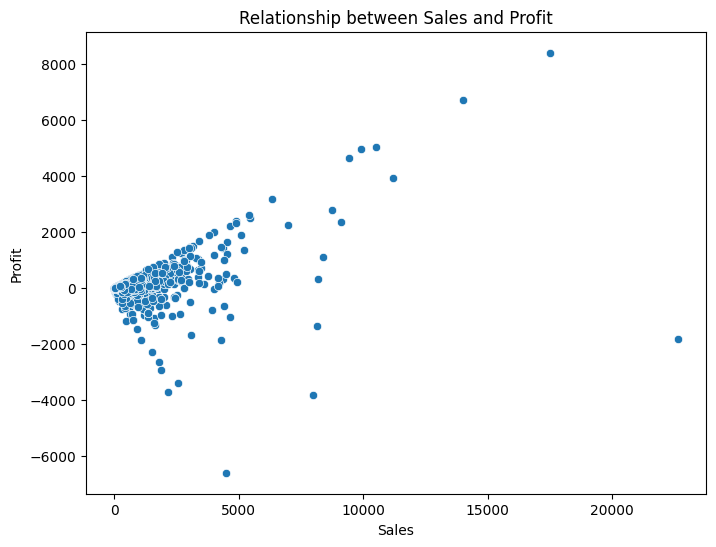

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Scatter Plot (Relationship between Sales and Profit)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Relationship between Sales and Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()


<ipython-input-17-064232500e15>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=df, ci=None)


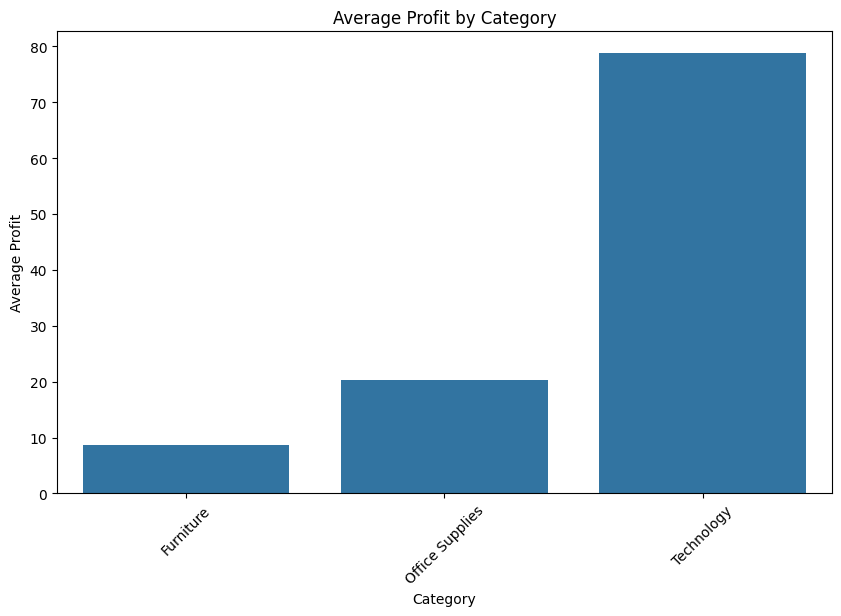

In [ ]:
# 2.Bar Chart (Average Profit by Category)
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=df, ci=None)
plt.title('Average Profit by Category')
plt.xlabel('Category')
plt.ylabel('Average Profit')
plt.xticks(rotation=45)
plt.show()


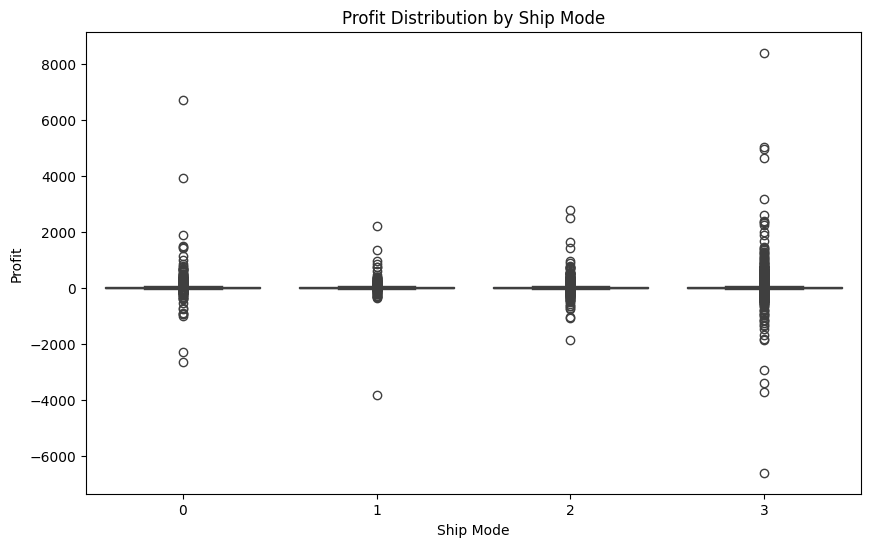

In [ ]:
# 3.Box Plot (Profit Distribution by Ship Mode)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ship Mode', y='Profit', data=df)
plt.title('Profit Distribution by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Profit')
plt.show()


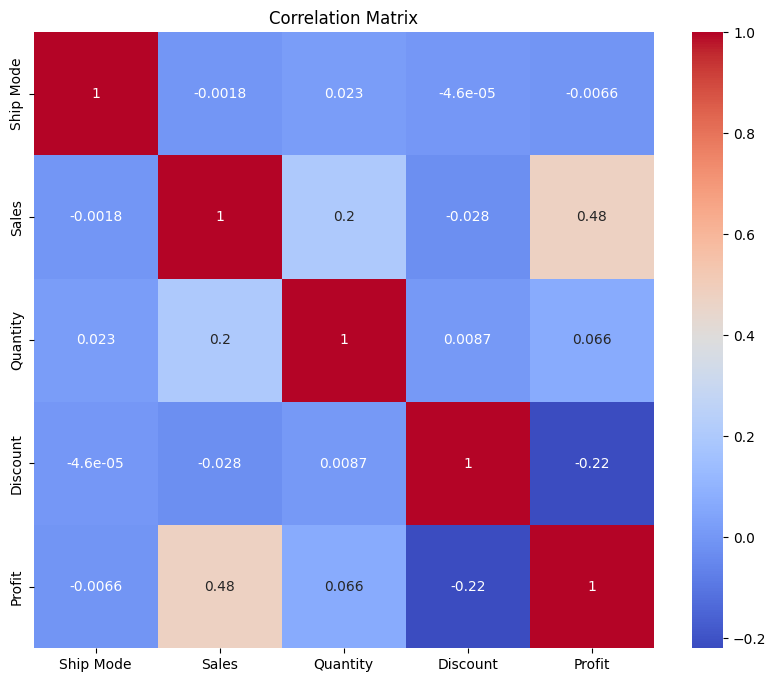

In [ ]:
# 4.Heatmap (Correlation Matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


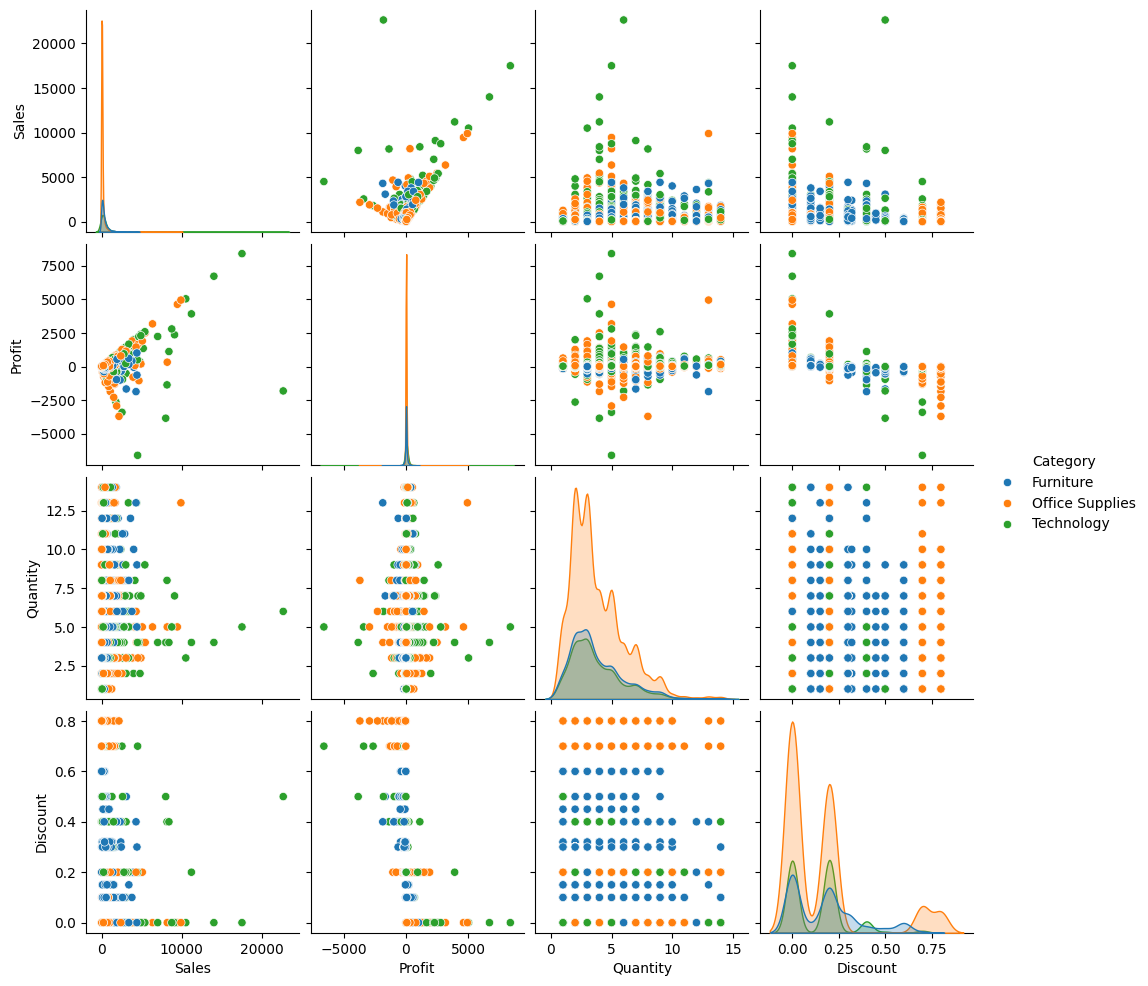

In [ ]:
# 5.Pair Plot (Relationships between Multiple Variables)
sns.pairplot(df, vars=['Sales', 'Profit', 'Quantity', 'Discount'], hue='Category')
plt.show()


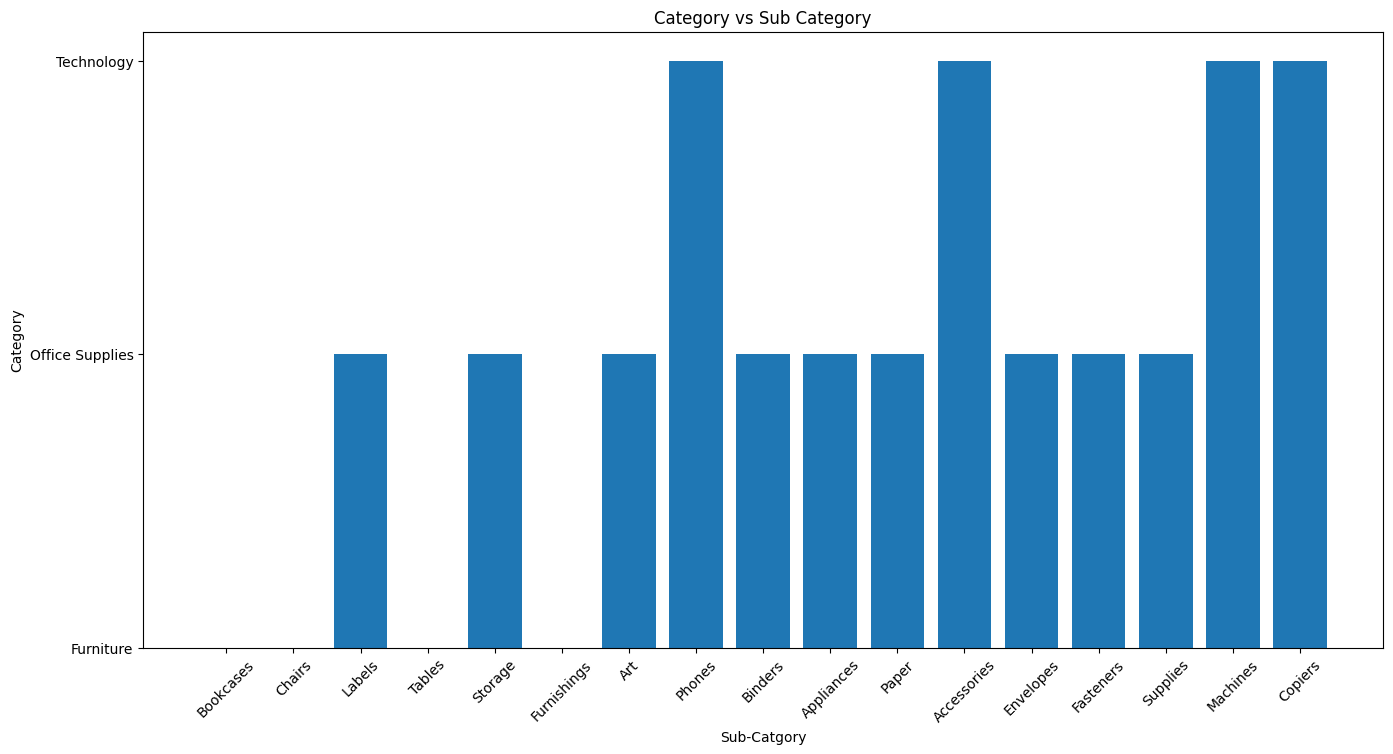

In [ ]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=df)
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

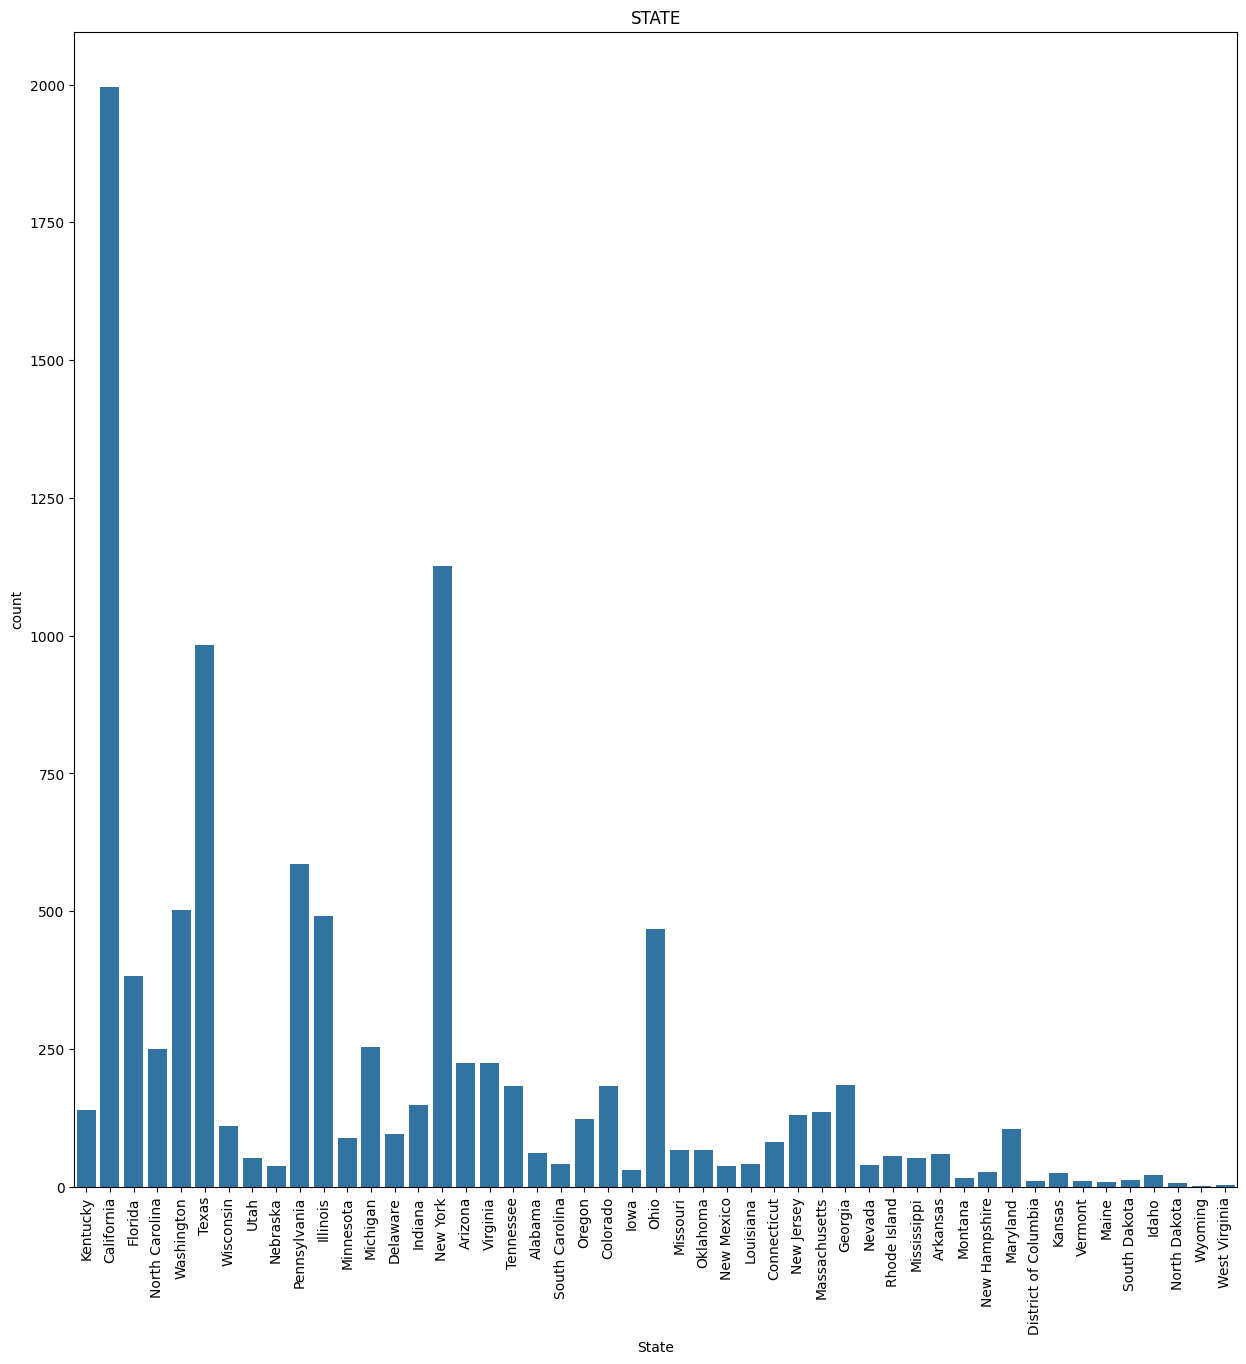

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()


/usr/local/lib/python3.10/dist-packages/mizani/palettes.py:419: UserWarning: Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors
/usr/local/lib/python3.10/dist-packages/mizani/palettes.py:419: UserWarning: Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors


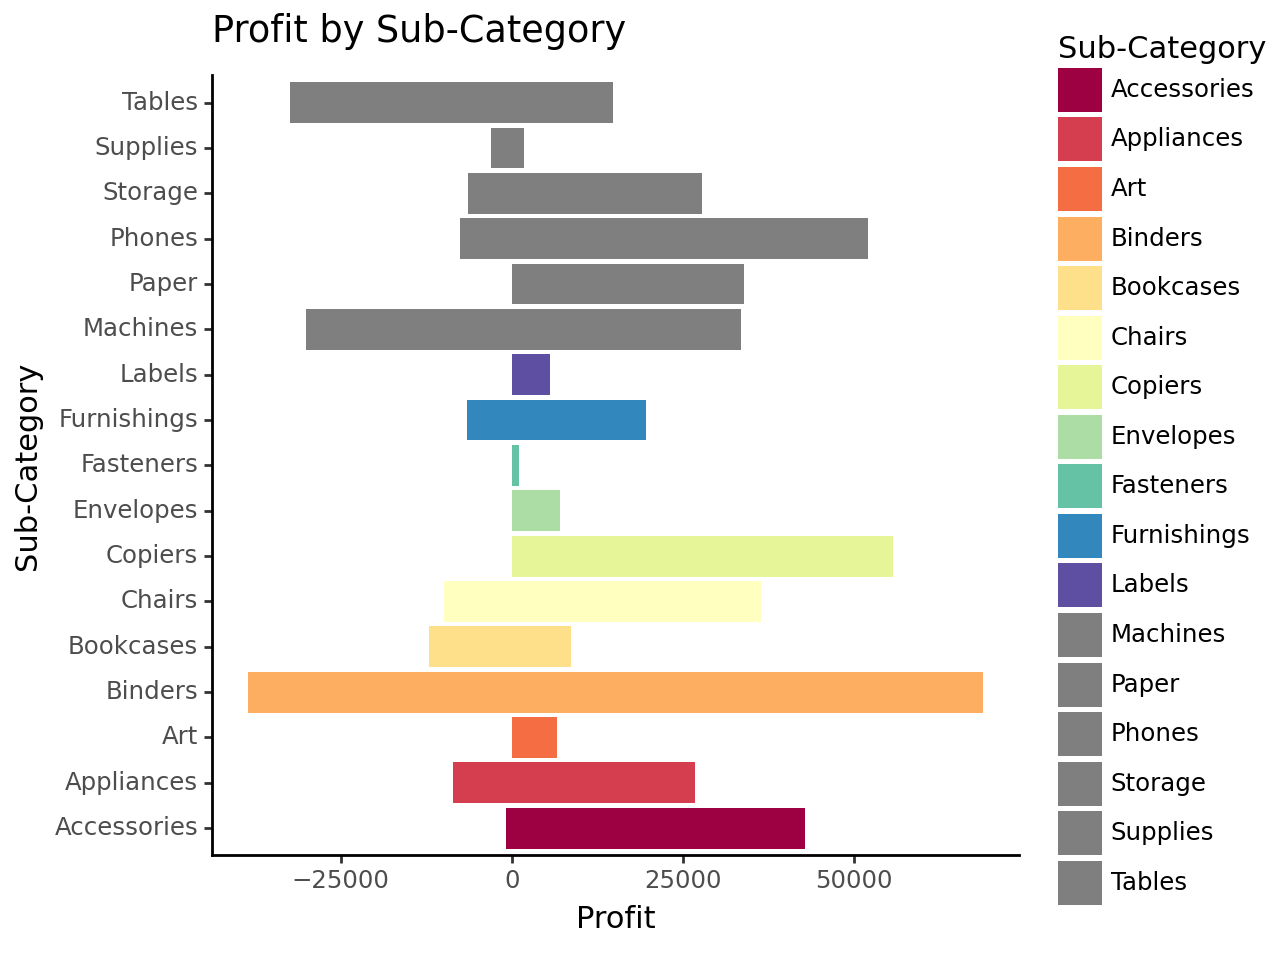

<Figure Size: (640 x 480)>

In [ ]:
!pip install plotnine
from plotnine import ggplot, aes, geom_col, coord_flip, scale_fill_brewer, theme_classic, ggtitle
# 5. Profit by Sub-Category
Profit_plot = (ggplot(df, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Profit by Sub-Category')) #Changed title to reflect plot

display(Profit_plot)

In [ ]:
'''Above Pie chart Shows the profit and loss of each and
every subcategories.Here from graph we can visualize
that "binders" sub-category has suffered the highest amount
of loss and also profit amongst all other sub-Categories
(For now we can't say that what is the reason it may be because of
discounts given on binders subcategory)'''

'Above Pie chart Shows the profit and loss of each and\nevery subcategories.Here from graph we can visualize\nthat "binders" sub-category has suffered the highest amount\nof loss and also profit amongst all other sub-Categories\n(For now we can\'t say that what is the reason it may be because of\ndiscounts given on binders subcategory)'

In [ ]:
'''Next,"Copiers" Sub-category has gain highest amount
 of profit with no loss.There are other sub-categories
 too who are not faced any kind of losses but their
 profit margins are also low.'''

'Next,"Copiers" Sub-category has gain highest amount\n of profit with no loss.There are other sub-categories\n too who are not faced any kind of losses but their\n profit margins are also low.'

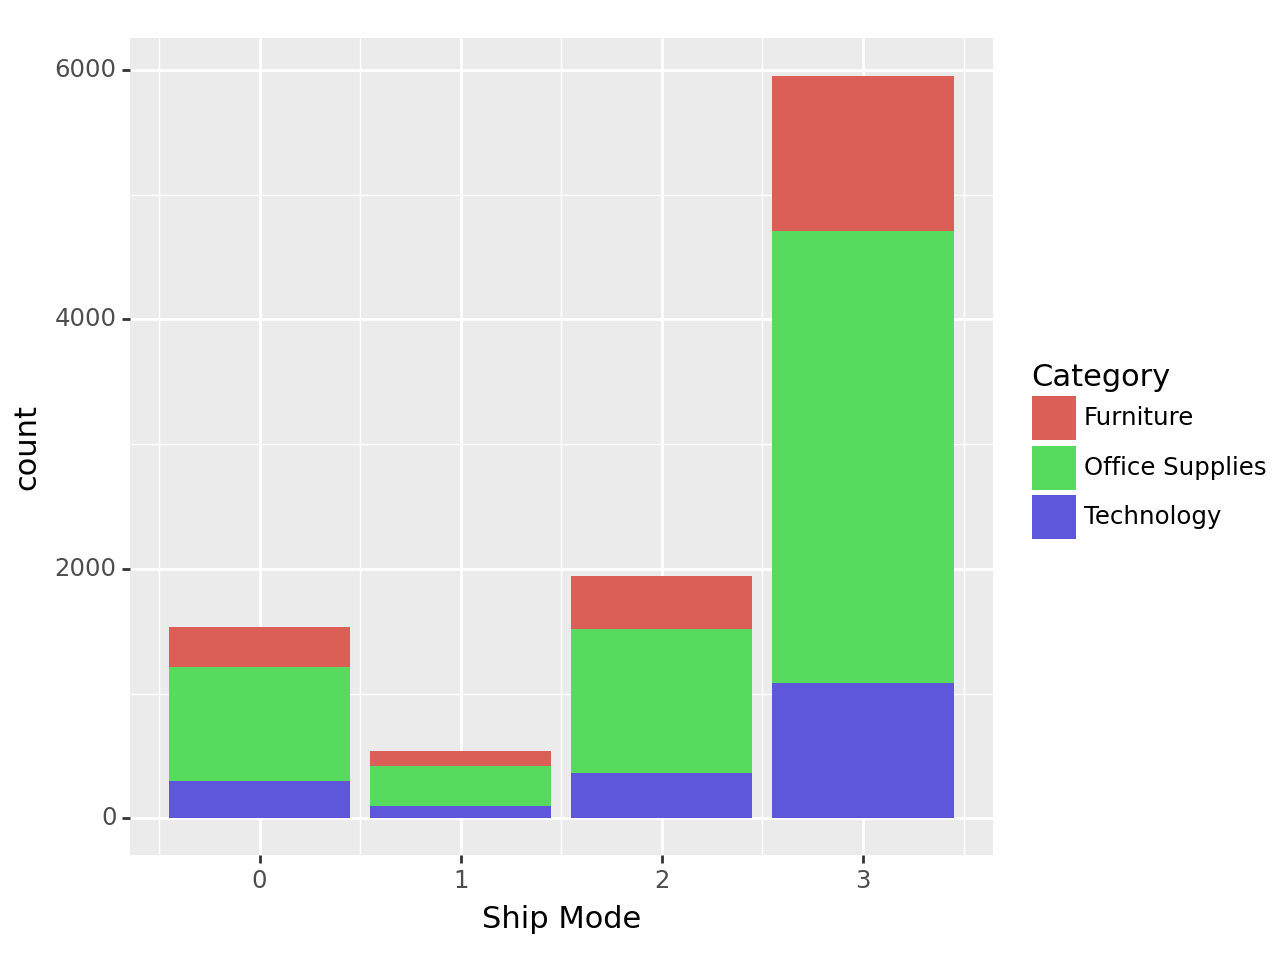

<Figure Size: (640 x 480)>

In [ ]:
!pip install plotnine
from plotnine import ggplot, aes, geom_col, coord_flip, scale_fill_brewer, theme_classic, ggtitle, geom_bar # Import geom_bar

ggplot(df, aes(x='Ship Mode', fill = 'Category')) + geom_bar(stat = 'count')

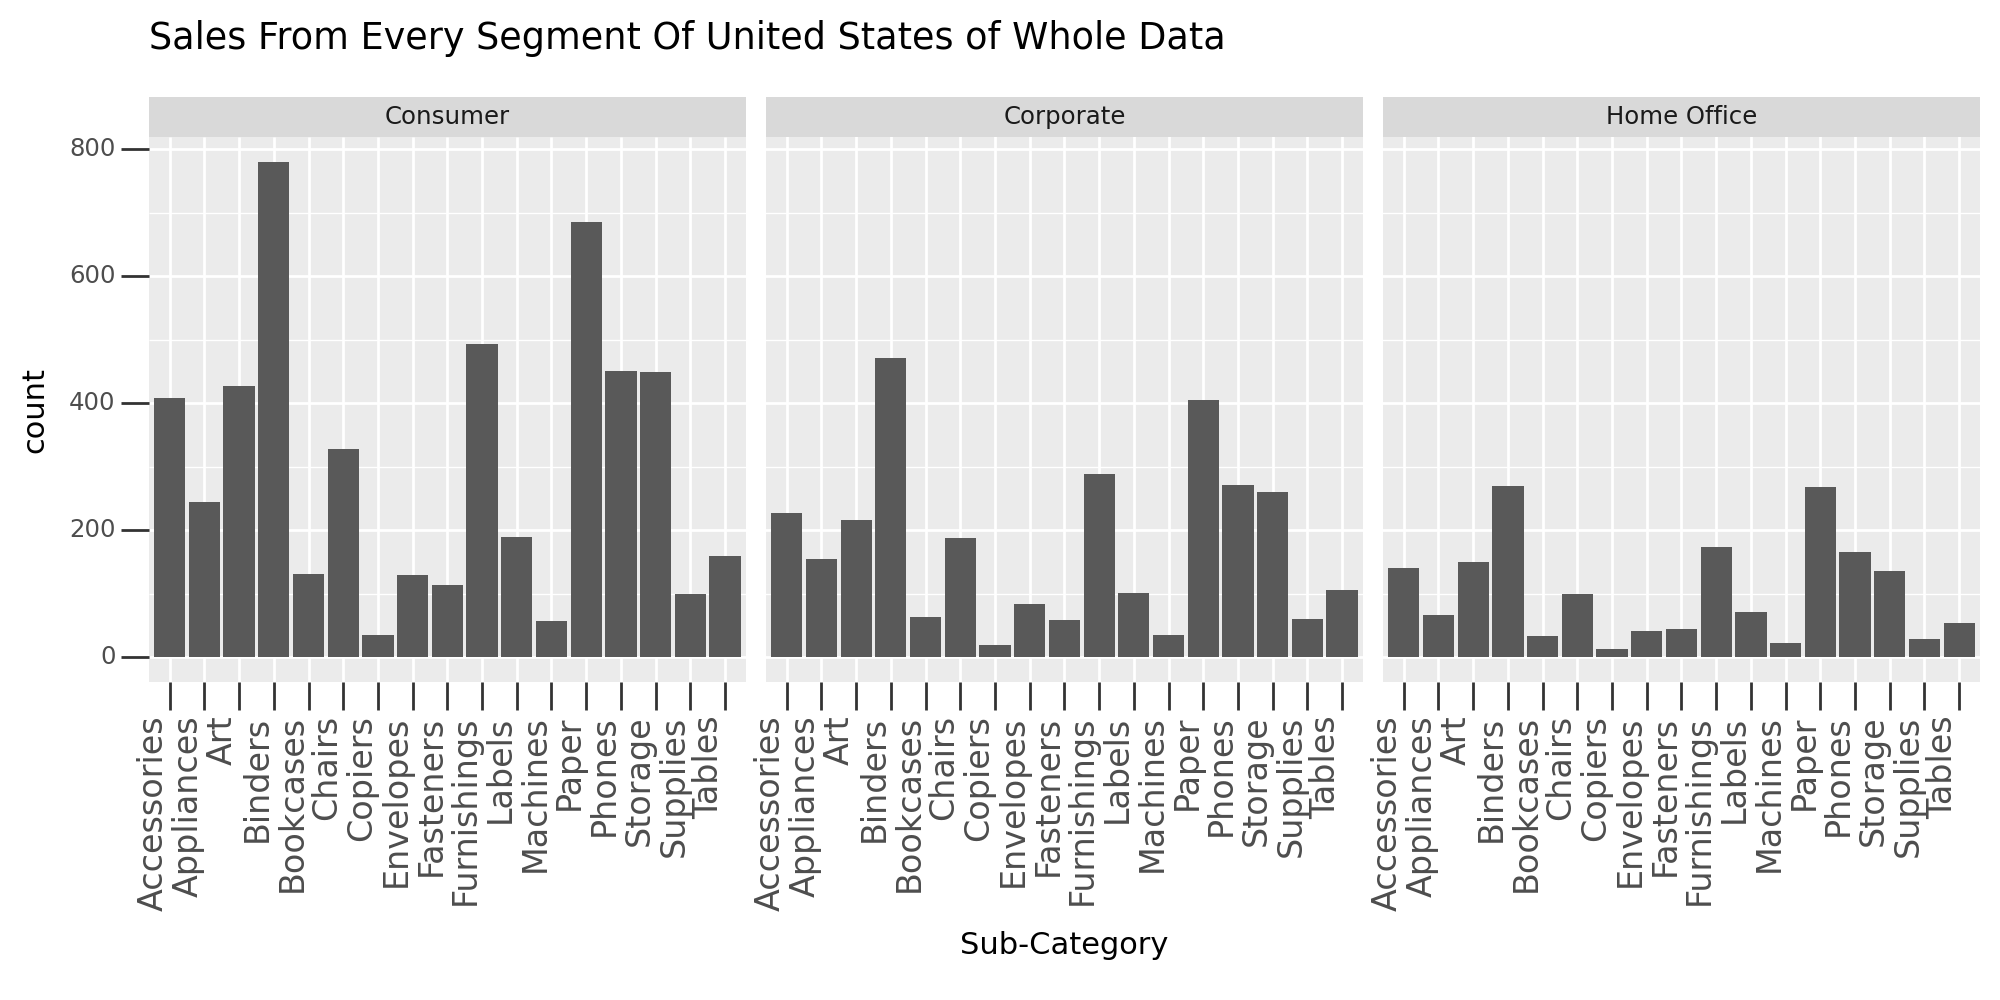

<Figure Size: (1000 x 500)>

In [ ]:
!pip install plotnine
from plotnine import ggplot, aes, geom_bar, facet_wrap, theme, element_text, ggtitle # Import theme

flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(df, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment'])
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States of Whole Data"))


From above Graph we can say that "Home Office" segment has less purchased Sub-Categories and in that
"Tables","Supplies","Machines","Copiers","Bookcases" has the lowest Sales. "Consumer" has purchased more sub-categories as compared to other segments.

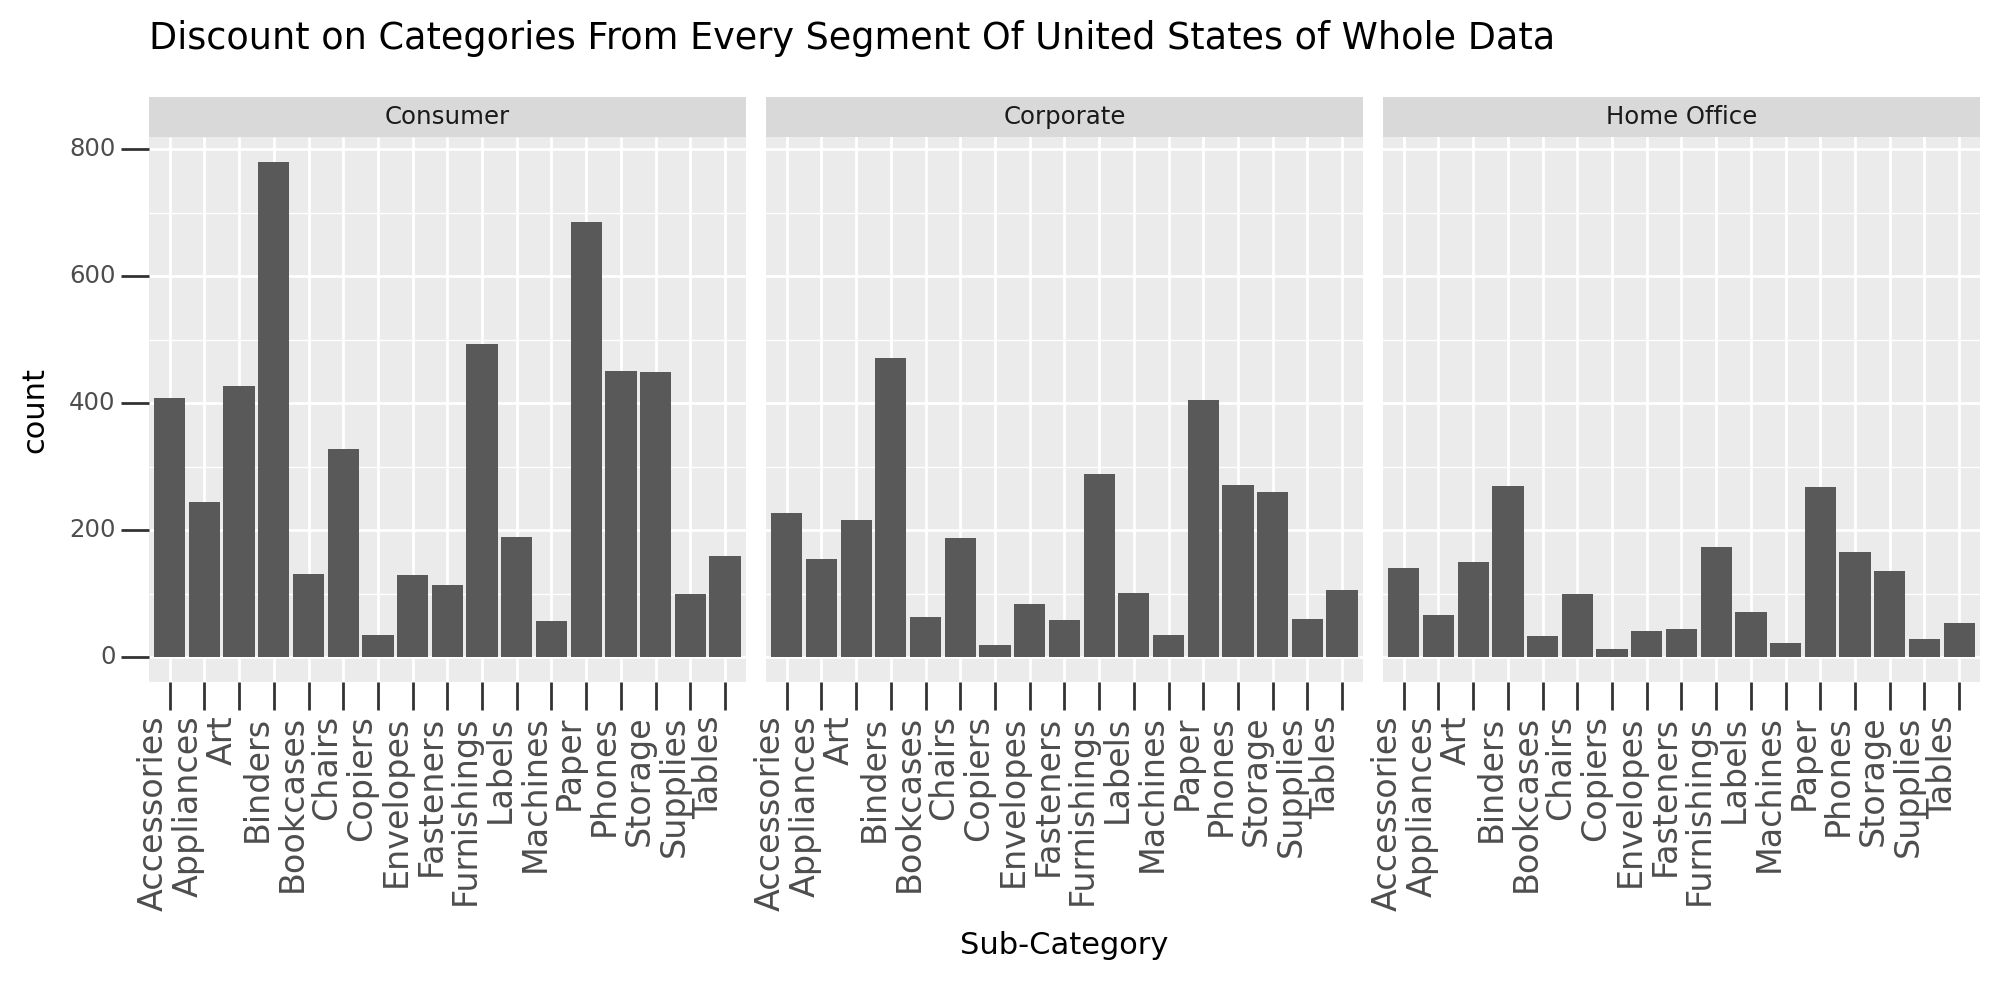

<Figure Size: (1000 x 500)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(df, aes(x='Sub-Category', fill='Discount')) + geom_bar() + facet_wrap(['Segment'])
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Discount on Categories From Every Segment Of United States of Whole Data"))

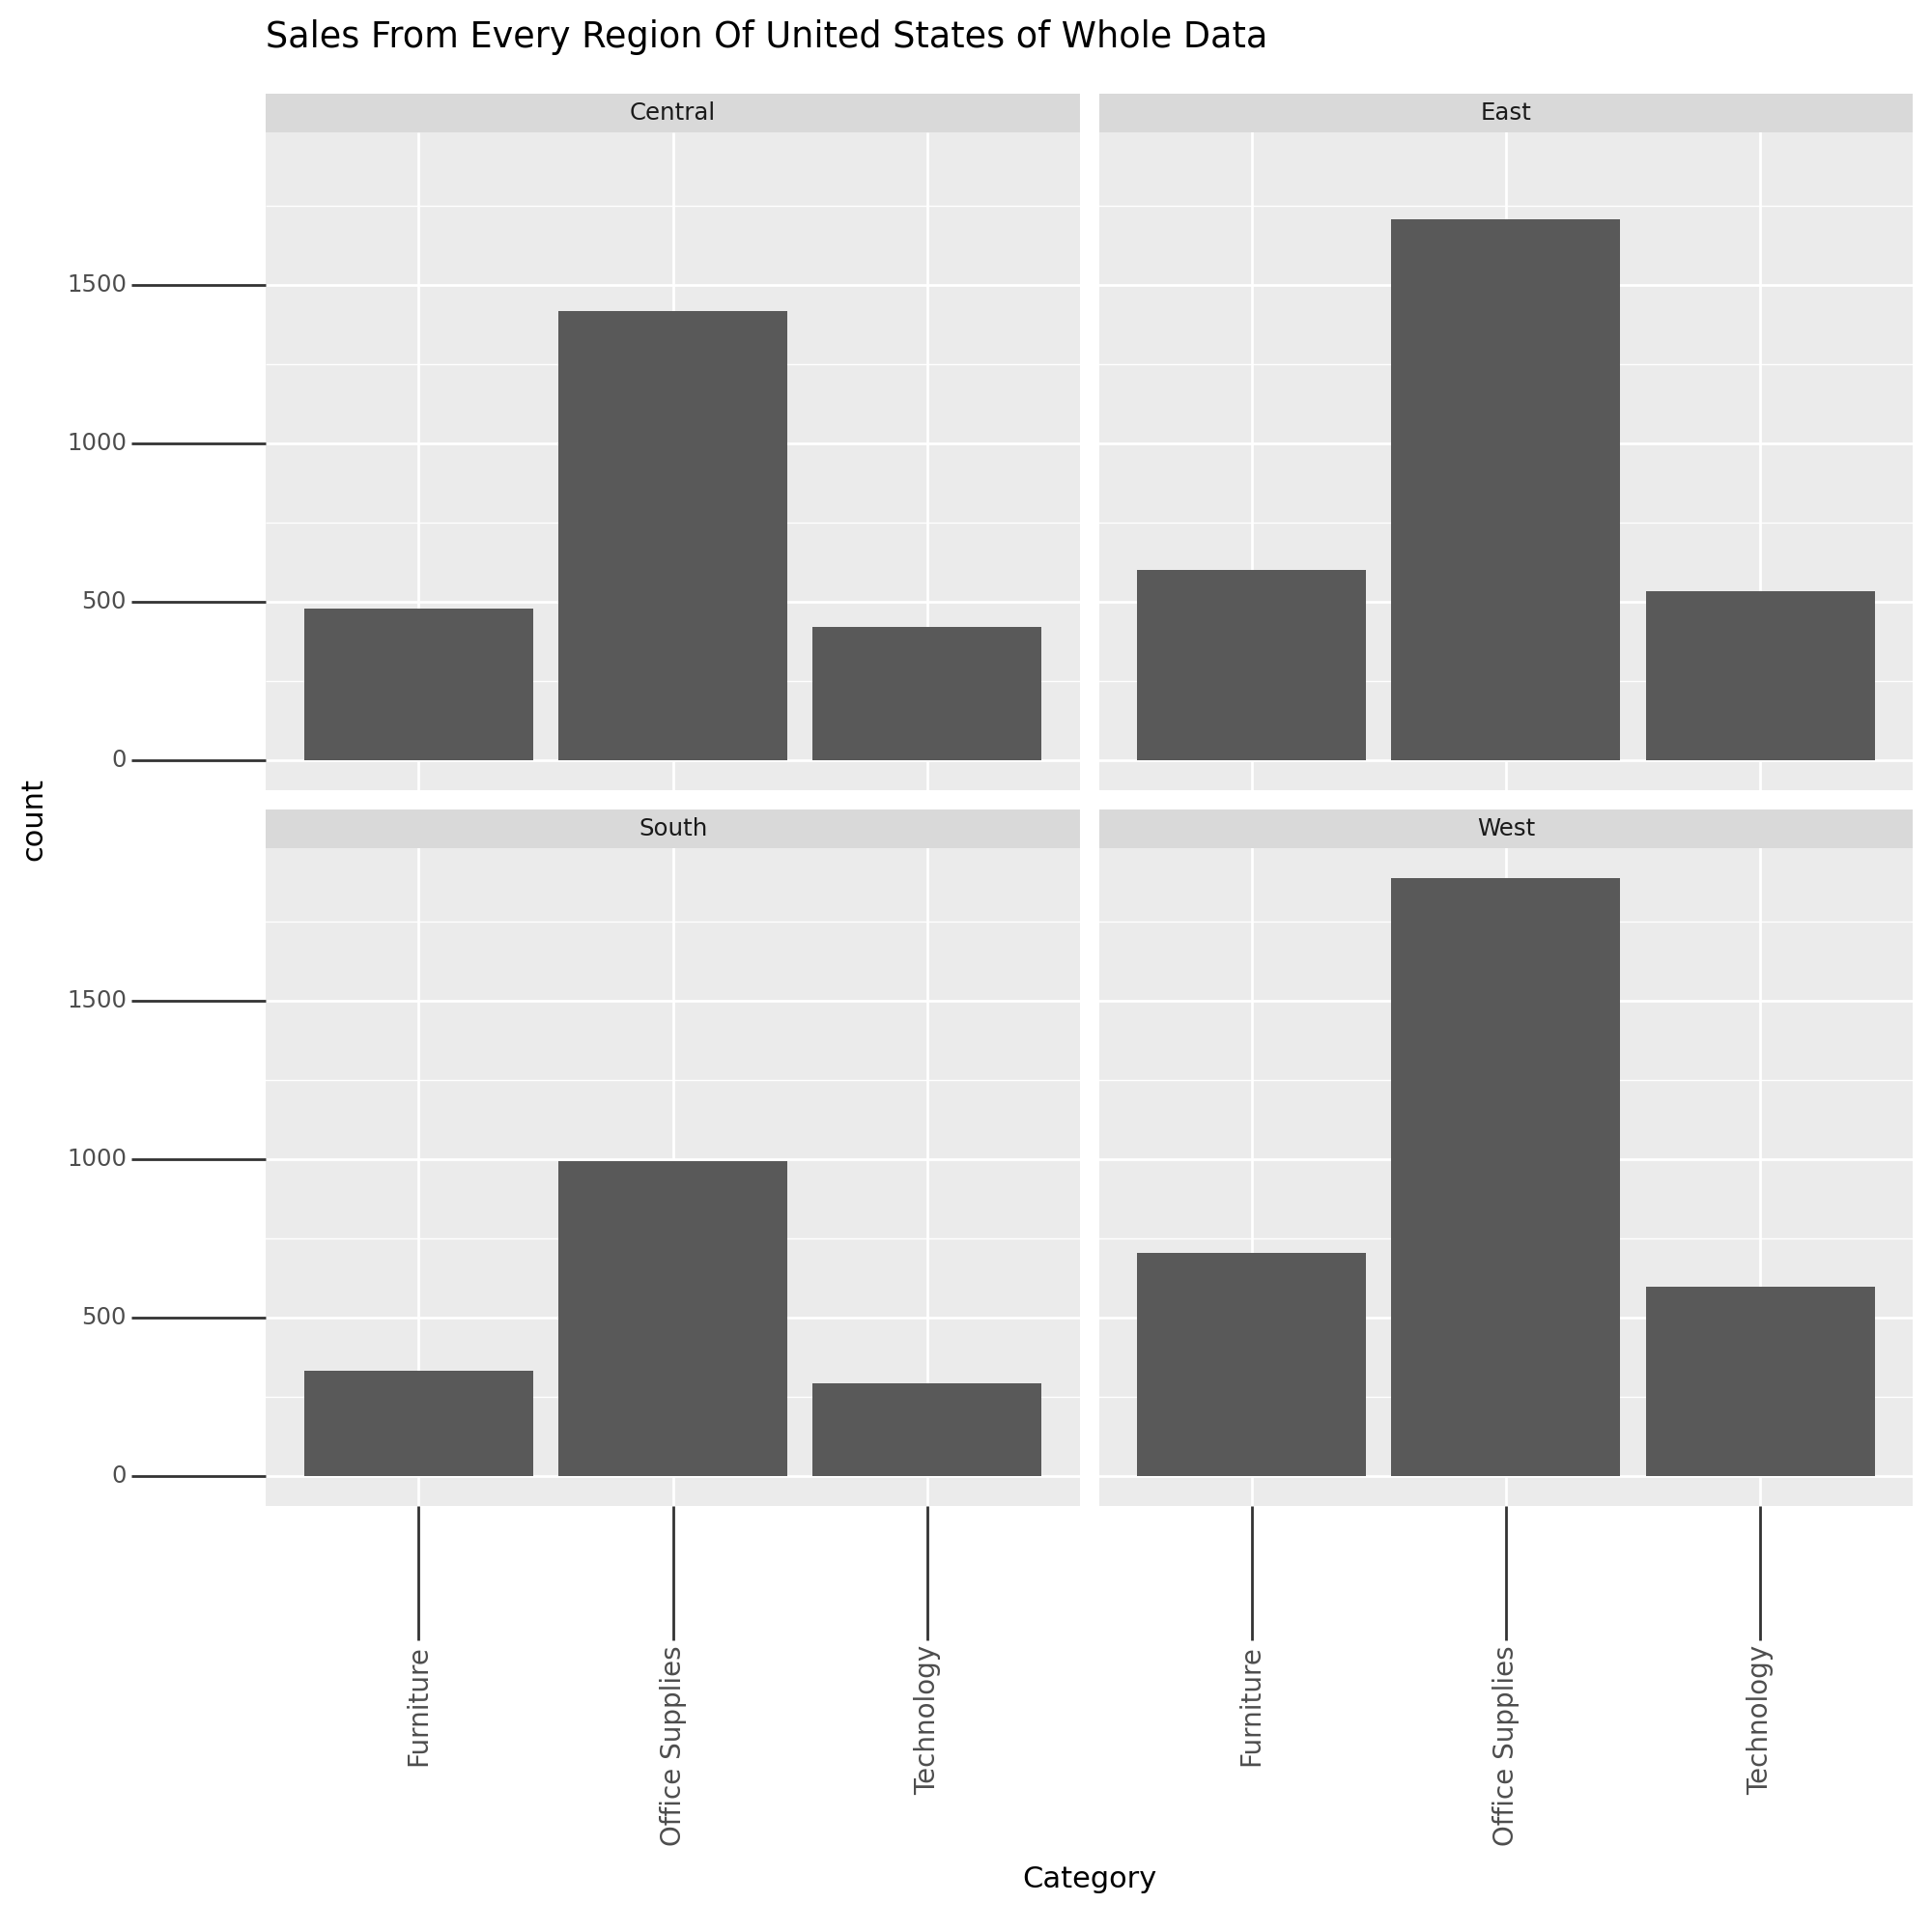

<Figure Size: (1000 x 1000)>

In [ ]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(df, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10))
+ facet_wrap(['Region']) + flip_xlabels+ ggtitle("Sales From Every Region Of United States of Whole Data"))

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
df['state_code'] = df.State.apply(lambda x: state_code[x])

In [ ]:
state_data = df[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index,
    z = state_data.Sales,
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()


Now, let us analyze the sales of a few random states from each profit bracket (high profit, medium profit, low profit, low loss and high loss) and try to observe some crucial trends which might help us in increasing the sales.

**We have a few questions to answer here.**

**1 What products do the most profit making states buy?**

**2 What products do the loss bearing states buy?**

**3 What product segment needs to be improved in order to drive the profits higher?**

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

def state_data_viewer(states):
    """Plots the turnover generated by different product categories and sub-categories for the list of given states.
    Args:
        states- List of all the states you want the plots for
    Returns:
        None
    """
    product_data = df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (28,5)) # Now plt is defined and can be used
        fig.suptitle(state, fontsize=14)
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

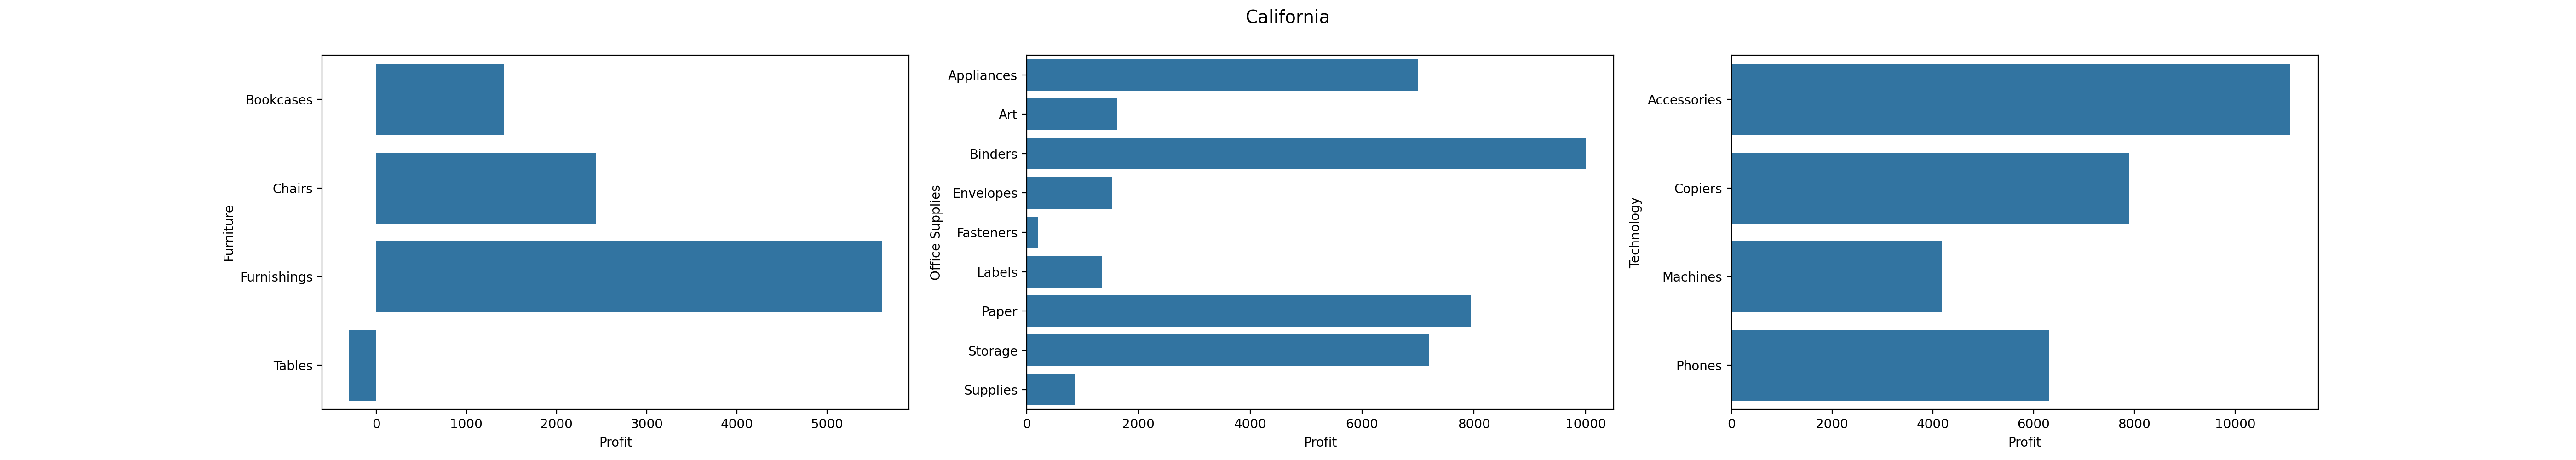

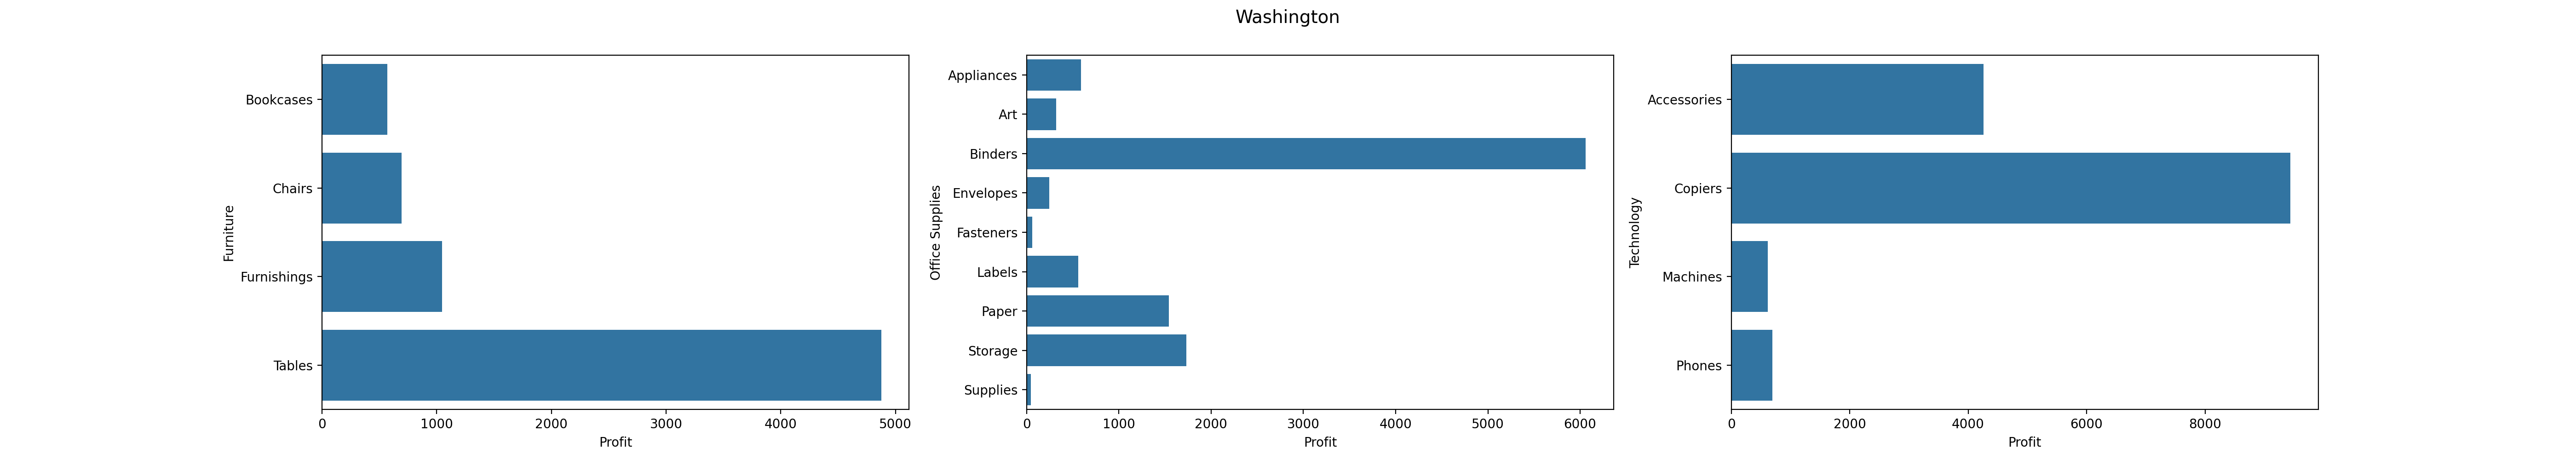

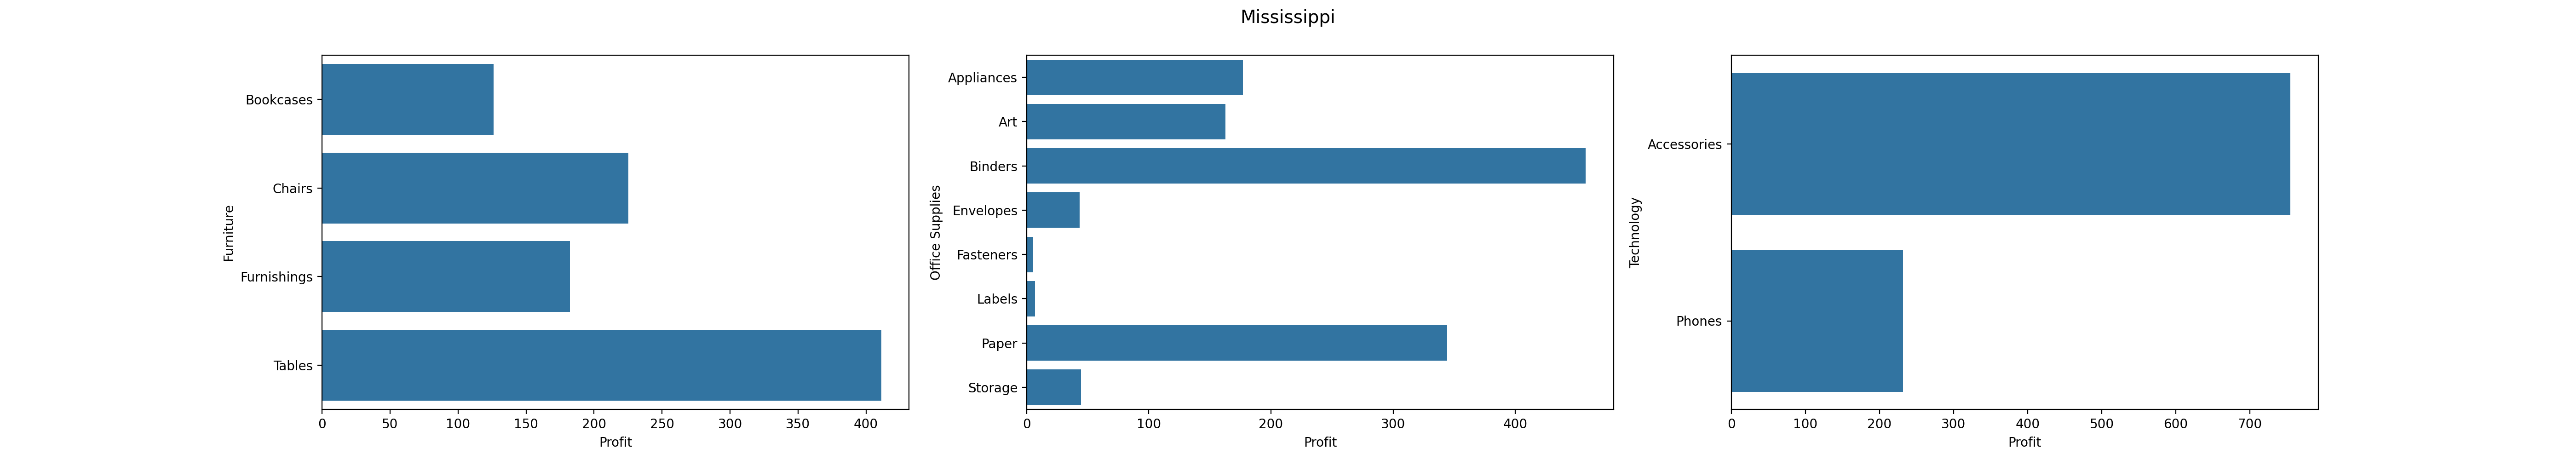

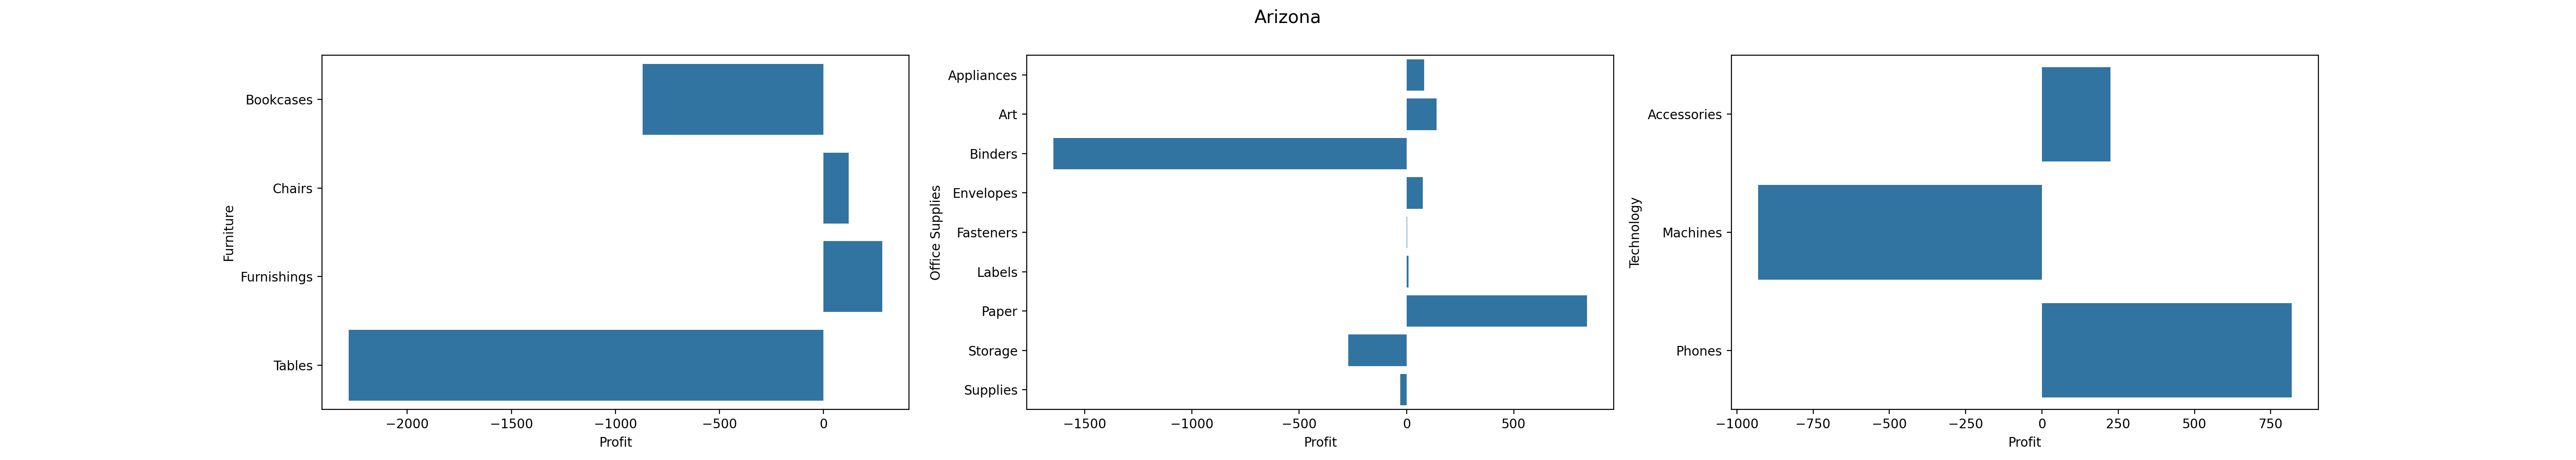

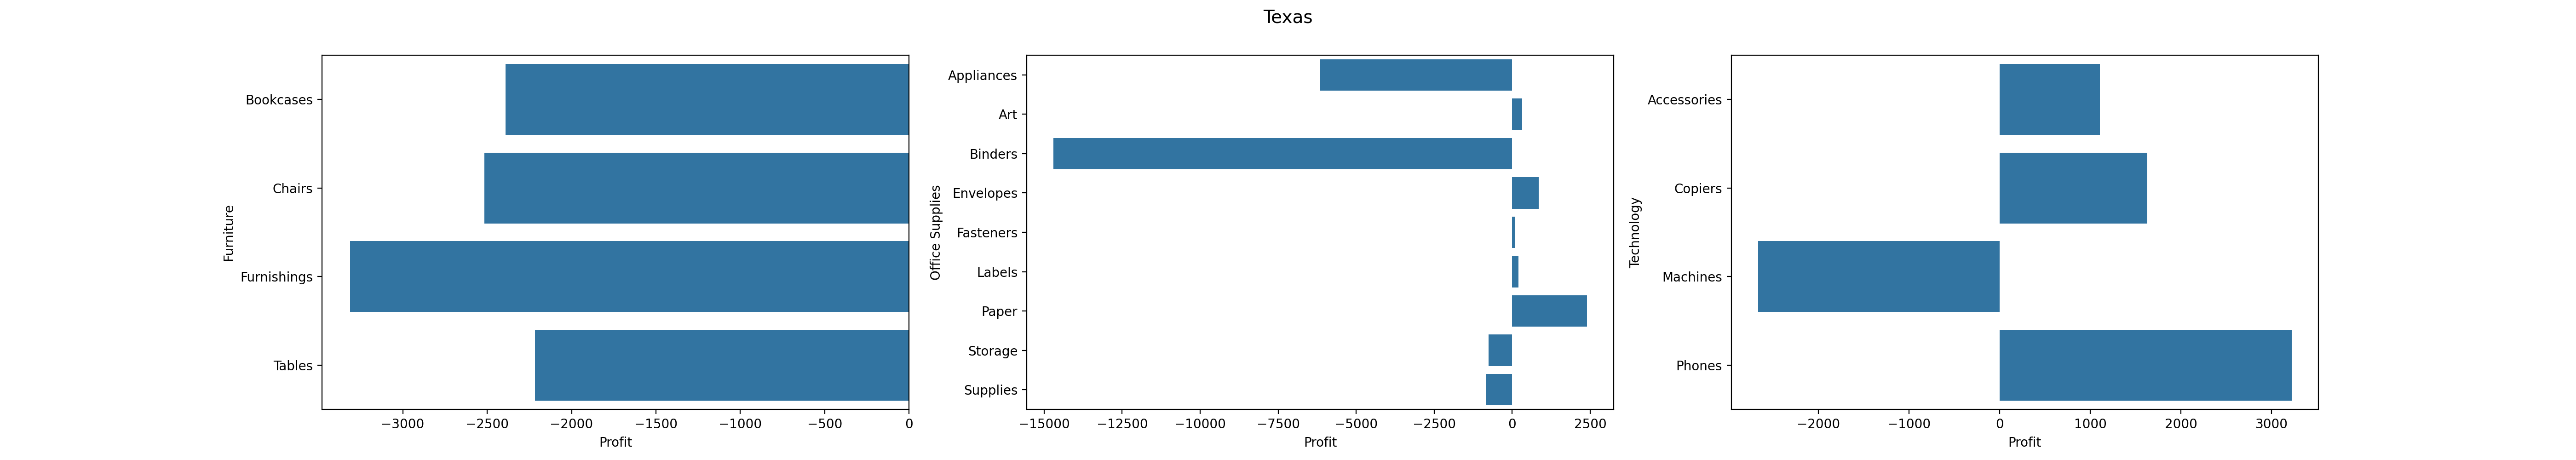

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

!pip install seaborn

states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(states)

In [ ]:
pip install tensorflow


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv('SampleSuperstore.csv')

# Dropping any rows with missing values
df.dropna(inplace=True)

# Encoding categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = df.drop('Sales', axis=1)  # Use other columns as features
y = df['Sales']  # Predicting Sales

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Create the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression (predicting a single continuous value)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 446668.0625 - val_loss: 258765.3750
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 483602.6562 - val_loss: 207808.1562
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 273027.1250 - val_loss: 188989.5938
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 350737.4062 - val_loss: 175158.5000
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184382.0312 - val_loss: 159088.6250
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 217283.6875 - val_loss: 139088.9219
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 179877.6875 - val_loss: 120112.5625
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 150962.4531 - val_loss: 103056.8516
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 123508.0000 - val_loss: 90694.1172
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 102708.6875 - val_loss: 83173.7266


In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

# Output the loss and first few predictions
print("Loss:", loss)
print("First 5 Predictions:", predictions[:5])


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 445925.6875
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Loss: 416452.78125
First 5 Predictions: [[172.29892 ]
 [ 39.462055]
 [223.04282 ]
 [220.57083 ]
 [334.69046 ]]


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 97474.1875 - val_loss: 79523.8047
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 99465.9375 - val_loss: 77381.1797
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79629.1719 - val_loss: 75808.7109
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 104314.3594 - val_loss: 74436.0781
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 110657.9453 - val_loss: 72952.4688
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 79857.3203 - val_loss: 71613.1484
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 83872.2266 - val_loss: 70222.8594
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 72285.0547 - val_loss: 68753.1719
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 91305.1641 - val_loss: 67936.5156
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 86451.1797 - val_loss: 65922.1172


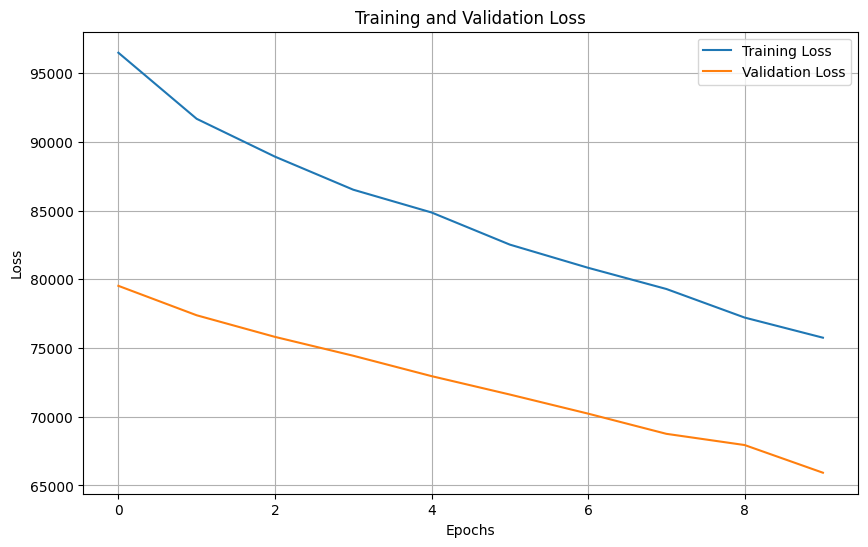

In [ ]:
# Plot the training loss and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
history1 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 69100.2344 - val_loss: 64537.3906
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 62559.4375 - val_loss: 63465.5898
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 71727.8359 - val_loss: 62145.3750
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63776.8320 - val_loss: 61402.0430
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 91411.9062 - val_loss: 60376.9961
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 50228.4766 - val_loss: 59237.8438
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47671.2070 - val_loss: 58579.2461
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66570.7266 - val_loss: 57825.1992
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56395.3359 - val_loss: 57487.1250
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 57929.7422 - val_loss: 56971.6875


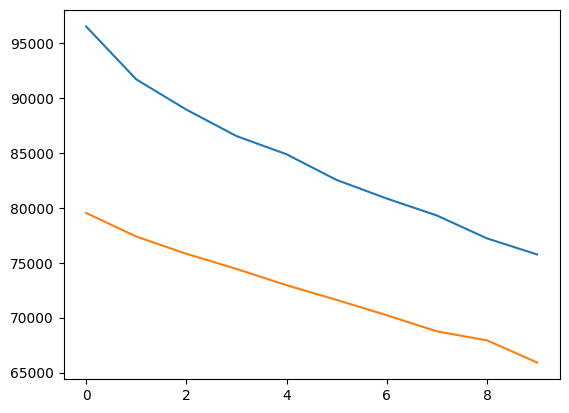

In [ ]:
# Plot without dropouts
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)

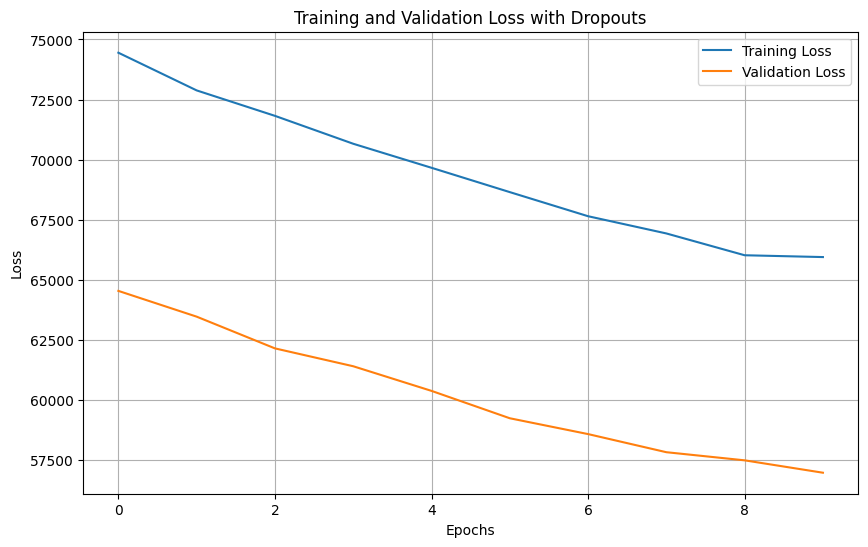

In [ ]:
# Plot the training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with Dropouts')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


---------------------- END ---------------------------------------